In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import datetime
import sqlite3
import os

# import xgboost
import xgboost as xgb
from xgboost import XGBClassifier

# Loading modelling algorithms
# Załadowanie algorytmów modeli
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors    import KNeighborsRegressor
from sklearn.ensemble     import AdaBoostRegressor
from sklearn.ensemble     import RandomForestRegressor

# Loading tools
# Załadownie narzędzi
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics         import r2_score

# Ignore warning messages
# Ignorowanie ostrzeżeń
import warnings
warnings.filterwarnings('ignore')

In [76]:
# Destination folder (comment unused directory)
# Wybranie folderu docelowego
#1 
#os.chdir("C:/Users/Lukasz/Documents/GitHub/Analysis-and-forecast-of-stock-exchange-price-based-on-selected-indicators-using-machine-learning/data")
#2
os.chdir("F:/GitHub/Analysis-and-forecast-of-stock-exchange-price-based-on-selected-indicators-using-machine-learning/data")

# Creating a connection
# Stworzenie połączenia za pomocą sqlite3
conn = sqlite3.connect('predictions.db')
c = conn.cursor()

In [77]:
indicator='SP500'
# Get SQLLite select statement for SP500 index and indicators
# Wybranie z bazy danych histotycznych wartosci akcji danej firmy oraz wskaźników
df = pd.read_sql_query("""select x."Date", c19."Index" Covid19, co."Index" as Crude_Oil, 
cr."Index" as Copper, s."Index" as Silver, p."Index" as Platinum,
ip."Index" as Industrial_Production, pa."Index" as Palladium, x."Index" as """+indicator+"""
 from """+indicator+""" as x
  LEFT OUTER JOIN Covid19 as c19 ON x.Date = C19.Date
  LEFT OUTER JOIN Crude_Oil as co ON x.Date=co.Date
  LEFT OUTER JOIN Copper as cr ON x.Date=cr.Date
  LEFT OUTER JOIN Silver as s ON x.Date=s.Date
  LEFT OUTER JOIN Platinum as p ON x.Date=p.Date
  LEFT OUTER JOIN Industrial_Prod as ip ON strftime('%Y-%m', x.Date)=strftime('%Y-%m', ip.Date)
  LEFT OUTER JOIN Palladium as pa ON x.Date=pa.Date
Where x."Index" and co."Index" and cr."Index" and s."Index" and p."Index"
and ip."Index" and pa."Index" IS NOT NULL
and x.Date < '2020-04-01'
""", conn)

# Delete date column
# Usunięcie kolumny "Date"
df = df.drop(columns=['Date'])

df.tail()

,Covid19,Crude_Oil,Copper,Silver,Platinum,Industrial_Production,Palladium,SP500
2510,416881.0,24.49,2.2040,13.965,745.50,103.664,2247.6,2475.56
2511,468092.0,22.60,2.1780,14.415,737.10,103.664,2226.1,2630.07
2512,527839.0,21.51,2.1720,14.315,740.82,103.664,2196.8,2541.47
2513,715377.0,20.09,2.1555,14.055,723.84,103.664,2197.6,2626.65
2514,777187.0,20.48,2.2280,13.930,728.80,103.664,2304.8,2584.59


In [78]:
# Fillling with zeros NaN values
# Wstawienie 0 w miejscu NaN
df=df.fillna(0)

In [79]:
# Splitting data into features X, and labels y
# Podzielnie danych na X i y w celu zbudowania modelu predykcyjnego
X = df.drop(['SP500'], axis=1)
y = df['SP500']

In [80]:
# splitting data into train and test data
# Podzielnie danych na dane uczące i dane testowe
seed = 60
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, 
                                                    random_state=seed)

In [81]:
# scaling values
# Przekształcenie wartości (Skalowanie polega na tym aby średnia wartość w danej kolumnie wynosiła 0, a średnie odychelnie 1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-8.75283560e-02,  9.04767490e-01,  1.33607245e+00, ...,
         1.20444130e+00, -6.36275462e-01, -4.96131305e-01],
       [-8.75283560e-02,  2.99062291e-04, -1.50380154e-01, ...,
         8.35633421e-01, -1.73600011e+00, -1.16058235e+00],
       [-8.75283560e-02, -8.21903872e-01, -9.14765922e-01, ...,
        -8.09001216e-01,  4.32150876e-02, -3.10062165e-01],
       ...,
       [-8.75283560e-02, -5.20866404e-01, -4.47494345e-01, ...,
        -9.97496286e-01,  1.47031880e+00,  2.74786921e+00],
       [-8.75283560e-02, -1.17718232e+00, -1.21452505e+00, ...,
        -6.92025176e-01,  1.21534401e-01, -4.53148334e-01],
       [-8.75283560e-02, -6.85397392e-01, -2.73810382e-01, ...,
        -1.29145162e+00,  1.48463757e+00,  1.81423909e+00]])

In [82]:
# testing different algorithms to get the data predictions (for visualization in plot)
# Testowanie róznych algorytmów oraz stworzenie listy w celu porównania
scores = []
models = ['Linear Regression'
          , 'Lasso Regression'
          , 'AdaBoost Regression'
          , 'RandomForest Regression'
          , 'XGBoost'
         ]

# Budowanie modeli predykcyjnych

## Linear Regression

In [83]:
lr = LinearRegression()
lr.fit(X_train , y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)

In [84]:
# Appending the list with r2 score
# 
scores.append(r2)
print('Linear Regression R2: {0:.2f}'.format(r2))

Linear Regression R2: 0.96


In [85]:
#df1 = df['SP500']
#y_pred1 = pd.DataFrame(y_pred)

#result = pd.concat([df1, y_pred1], axis=1, sort=False)
#result.head()
#result.describe()

# Lasso Regression

In [86]:
lasso = Lasso(normalize=True)
lasso.fit(X_train , y_train)
y_pred = lasso.predict(X_test)
r2 = r2_score(y_test, y_pred)

In [87]:
# Appending the list with r2 score
scores.append(r2)
print('Lasso Regression R2: {0:.2f}'.format(r2))

Lasso Regression R2: 0.95


# Adaboost classifier

In [88]:
adaboost = AdaBoostRegressor(n_estimators=1000)
adaboost.fit(X_train , y_train)
y_pred = adaboost.predict(X_test)
r2 = r2_score(y_test, y_pred)

In [89]:
# Appending the list with r2 score
scores.append(r2)
print('AdaBoost Regression R2: {0:.2f}'.format(r2))

AdaBoost Regression R2: 0.99


# Random forest

In [90]:
randomforest = RandomForestRegressor()
randomforest .fit(X_train , y_train)
y_pred = randomforest .predict(X_test)
r2 = r2_score(y_test, y_pred)

In [91]:
# Appending the list with r2 score
scores.append(r2)
print('Random Forest R2: {0:.2f}'.format(r2))

Random Forest R2: 1.00


# XGBOOST

In [92]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [93]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [94]:
# evaluate predictions
#accuracy_score(y_true, y_pred.round(), normalize=False)
r2 = r2_score(y_test, predictions)

In [95]:
# Appending the list with r2 score
scores.append(r2)
print('XGBoost R2: {0:.2f}'.format(r2))

XGBoost R2: 0.92


# Machine Learning algorthims R2 score comparison

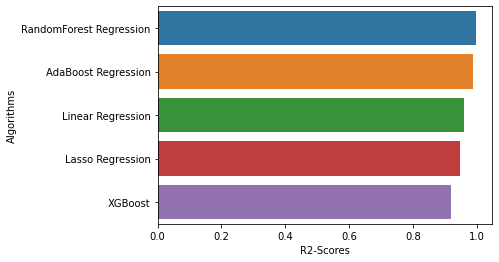

In [96]:
#Showing comparison on bar plot
ranking = pd.DataFrame({'Algorithms' : models , 'R2-Scores' : scores})
ranking = ranking.sort_values(by='R2-Scores' ,ascending=False)
ranking
 
sns.barplot(x='R2-Scores' , y='Algorithms' , data=ranking)